In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import json
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
with open ('./Set_StopLoss_MaximizeReturn/my__FINAL_portfolio_return_LassoLogRegXGB.json', 'r') as f:
    my_portfoli = json.load(f)

In [4]:
my_portfoli

{'2015-08-01': [['شبریز.xlsx', -0.1],
  ['کچاد.xlsx', -0.06014760147601476],
  ['شاوان.xlsx', -0.1],
  ['خراسان.xlsx', 0.003048780487804878]],
 '2015-09-01': [['فباهنر.xlsx', -0.01124567474048443],
  ['زاگرس.xlsx', 0.09867172675521822],
  ['شیران.xlsx', 0.021820448877805487],
  ['شبهرن.xlsx', -0.02049272116461366]],
 '2015-10-01': [['کگل.xlsx', -0.08649468892261002],
  ['شیراز.xlsx', 0.04375569735642662],
  ['خراسان.xlsx', 0.08792098445595854],
  ['کچاد.xlsx', -0.05047189167008617]],
 '2015-11-01': [['شفن.xlsx', -0.001073345259391771],
  ['مارون.xlsx', -0.003502203973190025],
  ['شپدیس.xlsx', -0.01655795283492223],
  ['شیراز.xlsx', -0.009318578916715201]],
 '2015-12-01': [['شیران.xlsx', 0.2950191570881226],
  ['شپدیس.xlsx', -0.05102040816326531],
  ['شبهرن.xlsx', 0.06527848748083802],
  ['مارون.xlsx', 0.08277282918257287]],
 '2016-01-01': [['شکبیر.xlsx', 0.006464883925947693],
  ['فخاس.xlsx', -0.014087870105062083],
  ['ارفع.xlsx', 0.021109770808202654],
  ['مارون.xlsx', -0.02709768784

In [5]:
date_range = pd.date_range(start='2015-08-01', end='2023-08-31', freq='MS')

In [6]:
df = pd.DataFrame(date_range, columns=['Date'])
df.set_index('Date', inplace=True)
df.head()

""
Date
2015-08-01
2015-09-01
2015-10-01
2015-11-01
2015-12-01


In [7]:
for date , value in my_portfoli.items():

    stock_weights = [0.25, 0.25, 0.25, 0.25]
    stocks = []
    print(date)
    for stock_return in value :
        stocks.append(stock_return[1])

    portfolio_return = sum(weight * ret for weight, ret in zip(stock_weights, stocks))
    df.loc[date , 'LassoLogRegXGB-EqualWeight'] = portfolio_return
    print(portfolio_return)
    print('*****' * 10)

2015-08-01
-0.06427470524705248
**************************************************
2015-09-01
0.022188444931981403
**************************************************
2015-10-01
-0.0013224746950777563
**************************************************
2015-11-01
-0.007613020246054807
**************************************************
2015-12-01
0.09801251639706704
**************************************************
2016-01-01
-0.0034027258041103244
**************************************************
2016-02-01
0.10107877685957808
**************************************************
2016-03-01
-0.0013018786188059382
**************************************************
2016-04-01
0.01421389396709323
**************************************************
2016-05-01
-0.039795096811193476
**************************************************
2016-06-01
0.12195178558468797
**************************************************
2016-07-01
-0.03947452814180842
**************************************************


In [8]:
df

,LassoLogRegXGB-EqualWeight
Date,
2015-08-01,-0.064275
2015-09-01,0.022188
2015-10-01,-0.001322
2015-11-01,-0.007613
2015-12-01,0.098013
...,...
2023-04-01,-0.099069
2023-05-01,-0.008096
2023-06-01,-0.094938


In [9]:
with open ('./Set_StopLoss_MaximizeReturn/my__FINAL_portfolio_return_LassoLogRegANN.json', 'r') as f:
    my_portfoli = json.load(f)

In [10]:
for date , value in my_portfoli.items():

    stock_weights = [0.25, 0.25, 0.25, 0.25]
    stocks = []
    print(date)
    for stock_return in value :
        stocks.append(stock_return[1])

    portfolio_return = sum(weight * ret for weight, ret in zip(stock_weights, stocks))
    df.loc[date , 'LassoLogRegANN-EqualWeight'] = portfolio_return
    print(portfolio_return)
    print('*****' * 10)

2015-08-01
-0.07049309319811156
**************************************************
2015-09-01
-0.04209287787881097
**************************************************
2015-10-01
-0.005933817049331332
**************************************************
2015-11-01
-0.0727774346695299
**************************************************
2015-12-01
0.16141515677877968
**************************************************
2016-01-01
0.15776681185965113
**************************************************
2016-02-01
-0.045754606237318765
**************************************************
2016-03-01
0.10191973029657071
**************************************************
2016-04-01
-0.05630735244137306
**************************************************
2016-05-01
-0.047927633559503
**************************************************
2016-06-01
0.12247559768437413
**************************************************
2016-07-01
-0.050152936381477255
**************************************************
2016-08-

In [11]:
df

,LassoLogRegXGB-EqualWeight,LassoLogRegANN-EqualWeight
Date,,
2015-08-01,-0.064275,-0.070493
2015-09-01,0.022188,-0.042093
2015-10-01,-0.001322,-0.005934
2015-11-01,-0.007613,-0.072777
2015-12-01,0.098013,0.161415
...,...,...
2023-04-01,-0.099069,-0.088418
2023-05-01,-0.008096,-0.062929
2023-06-01,-0.094938,-0.089950


In [12]:
with open ('./Set_StopLoss_MaximizeReturn/my__FINAL_portfolio_return_LassoLogRegRF.json', 'r') as f:
    my_portfoli = json.load(f)


for date , value in my_portfoli.items():

    stock_weights = [0.25, 0.25, 0.25, 0.25]
    stocks = []
    print(date)
    for stock_return in value :
        stocks.append(stock_return[1])

    portfolio_return = sum(weight * ret for weight, ret in zip(stock_weights, stocks))
    df.loc[date , 'LassoLogRegRF-EqualWeight'] = portfolio_return
    print(portfolio_return)
    print('*****' * 10)

2015-08-01
-0.060526315789473685
**************************************************
2015-09-01
0.07739098234209177
**************************************************
2015-10-01
-0.026469140770150702
**************************************************
2015-11-01
-0.0035737975168839394
**************************************************
2015-12-01
0.05923571012161963
**************************************************
2016-01-01
0.32021343643150874
**************************************************
2016-02-01
-0.07644216943246537
**************************************************
2016-03-01
0.09279905787265705
**************************************************
2016-04-01
0.01421389396709323
**************************************************
2016-05-01
-0.04917925147734734
**************************************************
2016-06-01
0.12604939690525194
**************************************************
2016-07-01
-0.03596589145311408
**************************************************
2016-0

In [13]:
df

,LassoLogRegXGB-EqualWeight,LassoLogRegANN-EqualWeight,LassoLogRegRF-EqualWeight
Date,,,
2015-08-01,-0.064275,-0.070493,-0.060526
2015-09-01,0.022188,-0.042093,0.077391
2015-10-01,-0.001322,-0.005934,-0.026469
2015-11-01,-0.007613,-0.072777,-0.003574
2015-12-01,0.098013,0.161415,0.059236
...,...,...,...
2023-04-01,-0.099069,-0.088418,-0.080024
2023-05-01,-0.008096,-0.062929,-0.022791
2023-06-01,-0.094938,-0.089950,-0.100000


In [14]:
with open ('./Set_StopLoss_MaximizeReturn/my__FINAL_portfolio_return_LassoLogRegSVM.json', 'r') as f:
    my_portfoli = json.load(f)


for date , value in my_portfoli.items():

    stock_weights = [0.25, 0.25, 0.25, 0.25]
    stocks = []
    print(date)
    for stock_return in value :
        stocks.append(stock_return[1])

    portfolio_return = sum(weight * ret for weight, ret in zip(stock_weights, stocks))
    df.loc[date , 'LassoLogRegSVM-EqualWeight'] = portfolio_return
    print(portfolio_return)
    print('*****' * 10)

2015-08-01
-0.06064710571297088
**************************************************
2015-09-01
-0.011998907233031918
**************************************************
2015-10-01
-0.02478507700188296
**************************************************
2015-11-01
-0.038210392856197775
**************************************************
2015-12-01
0.16048494851827946
**************************************************
2016-01-01
0.044145142753152206
**************************************************
2016-02-01
0.0952524486343668
**************************************************
2016-03-01
-0.04089984384704913
**************************************************
2016-04-01
-0.0355146033308721
**************************************************
2016-05-01
-0.05283814149328706
**************************************************
2016-06-01
0.11066506559924554
**************************************************
2016-07-01
-0.012301559041819465
**************************************************
2016-0

In [15]:
df

,LassoLogRegXGB-EqualWeight,LassoLogRegANN-EqualWeight,LassoLogRegRF-EqualWeight,LassoLogRegSVM-EqualWeight
Date,,,,
2015-08-01,-0.064275,-0.070493,-0.060526,-0.060647
2015-09-01,0.022188,-0.042093,0.077391,-0.011999
2015-10-01,-0.001322,-0.005934,-0.026469,-0.024785
2015-11-01,-0.007613,-0.072777,-0.003574,-0.038210
2015-12-01,0.098013,0.161415,0.059236,0.160485
...,...,...,...,...
2023-04-01,-0.099069,-0.088418,-0.080024,-0.012128
2023-05-01,-0.008096,-0.062929,-0.022791,-0.038205
2023-06-01,-0.094938,-0.089950,-0.100000,-0.087141


In [16]:
with open ('./Set_StopLoss_MaximizeReturn/my__FINAL_portfolio_return_RFANN.json', 'r') as f:
    my_portfoli = json.load(f)


for date , value in my_portfoli.items():

    stock_weights = [0.25, 0.25, 0.25, 0.25]
    stocks = []
    print(date)
    for stock_return in value :
        stocks.append(stock_return[1])

    portfolio_return = sum(weight * ret for weight, ret in zip(stock_weights, stocks))
    df.loc[date , 'RFANN-EqualWeight'] = portfolio_return
    print(portfolio_return)
    print('*****' * 10)

2015-08-01
-0.032891769640507926
**************************************************
2015-09-01
-0.022084679039902688
**************************************************
2015-10-01
-0.04481634021086103
**************************************************
2015-11-01
-0.04715332673185453
**************************************************
2015-12-01
0.1708237761738891
**************************************************
2016-01-01
0.02007411809762068
**************************************************
2016-02-01
0.04424920501223087
**************************************************
2016-03-01
-0.05881123058542414
**************************************************
2016-04-01
0.037620036352258586
**************************************************
2016-05-01
0.001001861916728618
**************************************************
2016-06-01
0.16048327618291064
**************************************************
2016-07-01
-0.039316387149973944
**************************************************
2016-0

In [17]:
df

,LassoLogRegXGB-EqualWeight,LassoLogRegANN-EqualWeight,LassoLogRegRF-EqualWeight,LassoLogRegSVM-EqualWeight,RFANN-EqualWeight
Date,,,,,
2015-08-01,-0.064275,-0.070493,-0.060526,-0.060647,-0.032892
2015-09-01,0.022188,-0.042093,0.077391,-0.011999,-0.022085
2015-10-01,-0.001322,-0.005934,-0.026469,-0.024785,-0.044816
2015-11-01,-0.007613,-0.072777,-0.003574,-0.038210,-0.047153
2015-12-01,0.098013,0.161415,0.059236,0.160485,0.170824
...,...,...,...,...,...
2023-04-01,-0.099069,-0.088418,-0.080024,-0.012128,-0.084568
2023-05-01,-0.008096,-0.062929,-0.022791,-0.038205,-0.037186
2023-06-01,-0.094938,-0.089950,-0.100000,-0.087141,-0.049598


In [18]:
with open ('./Set_StopLoss_MaximizeReturn/my__FINAL_portfolio_return_RFRF.json', 'r') as f:
    my_portfoli = json.load(f)


for date , value in my_portfoli.items():

    stock_weights = [0.25, 0.25, 0.25, 0.25]
    stocks = []
    print(date)
    for stock_return in value :
        stocks.append(stock_return[1])

    portfolio_return = sum(weight * ret for weight, ret in zip(stock_weights, stocks))
    df.loc[date , 'RFRF-EqualWeight'] = portfolio_return
    print(portfolio_return)
    print('*****' * 10)

2015-08-01
-0.0763150684931507
**************************************************
2015-09-01
0.039095405011208485
**************************************************
2015-10-01
0.023836593392163912
**************************************************
2015-11-01
-0.003050997841839369
**************************************************
2015-12-01
0.37367418890236354
**************************************************
2016-01-01
0.2832152218701047
**************************************************
2016-02-01
0.006637531191411049
**************************************************
2016-03-01
-0.005688499511399709
**************************************************
2016-04-01
0.040861250954783324
**************************************************
2016-05-01
-0.0674261655315475
**************************************************
2016-06-01
-0.009248893540109993
**************************************************
2016-07-01
0.002461600910945636
**************************************************
2016-0

In [19]:
df

,LassoLogRegXGB-EqualWeight,LassoLogRegANN-EqualWeight,LassoLogRegRF-EqualWeight,LassoLogRegSVM-EqualWeight,RFANN-EqualWeight,RFRF-EqualWeight
Date,,,,,,
2015-08-01,-0.064275,-0.070493,-0.060526,-0.060647,-0.032892,-0.076315
2015-09-01,0.022188,-0.042093,0.077391,-0.011999,-0.022085,0.039095
2015-10-01,-0.001322,-0.005934,-0.026469,-0.024785,-0.044816,0.023837
2015-11-01,-0.007613,-0.072777,-0.003574,-0.038210,-0.047153,-0.003051
2015-12-01,0.098013,0.161415,0.059236,0.160485,0.170824,0.373674
...,...,...,...,...,...,...
2023-04-01,-0.099069,-0.088418,-0.080024,-0.012128,-0.084568,-0.086365
2023-05-01,-0.008096,-0.062929,-0.022791,-0.038205,-0.037186,-0.071262
2023-06-01,-0.094938,-0.089950,-0.100000,-0.087141,-0.049598,-0.089950


In [20]:
with open ('./Set_StopLoss_MaximizeReturn/my__FINAL_portfolio_return_RFSVM.json', 'r') as f:
    my_portfoli = json.load(f)


for date , value in my_portfoli.items():

    stock_weights = [0.25, 0.25, 0.25, 0.25]
    stocks = []
    print(date)
    for stock_return in value :
        stocks.append(stock_return[1])

    portfolio_return = sum(weight * ret for weight, ret in zip(stock_weights, stocks))
    df.loc[date , 'RFSVM-EqualWeight'] = portfolio_return
    print(portfolio_return)
    print('*****' * 10)

2015-08-01
-0.04884062516816239
**************************************************
2015-09-01
0.04826231037514757
**************************************************
2015-10-01
0.0017755674489239957
**************************************************
2015-11-01
-0.04663962218454832
**************************************************
2015-12-01
0.17357870372177164
**************************************************
2016-01-01
0.04962343455796028
**************************************************
2016-02-01
-0.008643579372734099
**************************************************
2016-03-01
-0.03783470974095569
**************************************************
2016-04-01
-0.057601078167115904
**************************************************
2016-05-01
-0.0059714389419489155
**************************************************
2016-06-01
-0.02390362923621271
**************************************************
2016-07-01
0.003702063422496035
**************************************************
20

In [21]:
df

,LassoLogRegXGB-EqualWeight,LassoLogRegANN-EqualWeight,LassoLogRegRF-EqualWeight,LassoLogRegSVM-EqualWeight,RFANN-EqualWeight,RFRF-EqualWeight,RFSVM-EqualWeight
Date,,,,,,,
2015-08-01,-0.064275,-0.070493,-0.060526,-0.060647,-0.032892,-0.076315,-0.048841
2015-09-01,0.022188,-0.042093,0.077391,-0.011999,-0.022085,0.039095,0.048262
2015-10-01,-0.001322,-0.005934,-0.026469,-0.024785,-0.044816,0.023837,0.001776
2015-11-01,-0.007613,-0.072777,-0.003574,-0.038210,-0.047153,-0.003051,-0.046640
2015-12-01,0.098013,0.161415,0.059236,0.160485,0.170824,0.373674,0.173579
...,...,...,...,...,...,...,...
2023-04-01,-0.099069,-0.088418,-0.080024,-0.012128,-0.084568,-0.086365,-0.097107
2023-05-01,-0.008096,-0.062929,-0.022791,-0.038205,-0.037186,-0.071262,-0.038399
2023-06-01,-0.094938,-0.089950,-0.100000,-0.087141,-0.049598,-0.089950,-0.097191


In [22]:
with open ('./Set_StopLoss_MaximizeReturn/my__FINAL_portfolio_return_RFXGB.json', 'r') as f:
    my_portfoli = json.load(f)


for date , value in my_portfoli.items():

    stock_weights = [0.25, 0.25, 0.25, 0.25]
    stocks = []
    print(date)
    for stock_return in value :
        stocks.append(stock_return[1])

    portfolio_return = sum(weight * ret for weight, ret in zip(stock_weights, stocks))
    df.loc[date , 'RFXGB-EqualWeight'] = portfolio_return
    print(portfolio_return)
    print('*****' * 10)

2015-08-01
-0.039215858813073046
**************************************************
2015-09-01
0.024406302827722357
**************************************************
2015-10-01
0.04057084628267442
**************************************************
2015-11-01
-0.011751623856874503
**************************************************
2015-12-01
0.05138219150135095
**************************************************
2016-01-01
0.014771072382397114
**************************************************
2016-02-01
0.2234844613216256
**************************************************
2016-03-01
0.19483078560075948
**************************************************
2016-04-01
0.039814600237079965
**************************************************
2016-05-01
-0.024830106407441172
**************************************************
2016-06-01
0.2607982816910797
**************************************************
2016-07-01
0.021019997904520756
**************************************************
2016-08-

In [23]:
df

,LassoLogRegXGB-EqualWeight,LassoLogRegANN-EqualWeight,LassoLogRegRF-EqualWeight,LassoLogRegSVM-EqualWeight,RFANN-EqualWeight,RFRF-EqualWeight,RFSVM-EqualWeight,RFXGB-EqualWeight
Date,,,,,,,,
2015-08-01,-0.064275,-0.070493,-0.060526,-0.060647,-0.032892,-0.076315,-0.048841,-0.039216
2015-09-01,0.022188,-0.042093,0.077391,-0.011999,-0.022085,0.039095,0.048262,0.024406
2015-10-01,-0.001322,-0.005934,-0.026469,-0.024785,-0.044816,0.023837,0.001776,0.040571
2015-11-01,-0.007613,-0.072777,-0.003574,-0.038210,-0.047153,-0.003051,-0.046640,-0.011752
2015-12-01,0.098013,0.161415,0.059236,0.160485,0.170824,0.373674,0.173579,0.051382
...,...,...,...,...,...,...,...,...
2023-04-01,-0.099069,-0.088418,-0.080024,-0.012128,-0.084568,-0.086365,-0.097107,-0.074174
2023-05-01,-0.008096,-0.062929,-0.022791,-0.038205,-0.037186,-0.071262,-0.038399,-0.039892
2023-06-01,-0.094938,-0.089950,-0.100000,-0.087141,-0.049598,-0.089950,-0.097191,-0.100000


In [24]:
df = df.shift(periods=1)
df = df['2015-09-01' :]
df.index = df.index.strftime('%Y-%m')


In [25]:
df

,LassoLogRegXGB-EqualWeight,LassoLogRegANN-EqualWeight,LassoLogRegRF-EqualWeight,LassoLogRegSVM-EqualWeight,RFANN-EqualWeight,RFRF-EqualWeight,RFSVM-EqualWeight,RFXGB-EqualWeight
Date,,,,,,,,
2015-09,-0.064275,-0.070493,-0.060526,-0.060647,-0.032892,-0.076315,-0.048841,-0.039216
2015-10,0.022188,-0.042093,0.077391,-0.011999,-0.022085,0.039095,0.048262,0.024406
2015-11,-0.001322,-0.005934,-0.026469,-0.024785,-0.044816,0.023837,0.001776,0.040571
2015-12,-0.007613,-0.072777,-0.003574,-0.038210,-0.047153,-0.003051,-0.046640,-0.011752
2016-01,0.098013,0.161415,0.059236,0.160485,0.170824,0.373674,0.173579,0.051382
...,...,...,...,...,...,...,...,...
2023-04,0.314254,0.240112,0.329858,0.226717,0.229031,0.273887,0.246707,0.205780
2023-05,-0.099069,-0.088418,-0.080024,-0.012128,-0.084568,-0.086365,-0.097107,-0.074174
2023-06,-0.008096,-0.062929,-0.022791,-0.038205,-0.037186,-0.071262,-0.038399,-0.039892


In [26]:
Total_stock_market_index = pd.read_excel('/home/amin/thesis/src/data/MAIN-FILES/Macroeconomics-data_1402-10-23.xlsx')

In [27]:
Total_stock_market_index.rename(columns = {'تاریخ میلادی':'Date', 'مقدار' : 'Total stock market index'}, inplace = True)

In [28]:
Total_stock_market_index['Date'] = pd.to_datetime(Total_stock_market_index['Date'])
Total_stock_market_index.set_index('Date', inplace = True)

In [29]:
Total_stock_market_index = Total_stock_market_index.loc['2015-07-01': '2023-09-01']

In [30]:
total_stock_market_index = Total_stock_market_index

In [31]:
date_range2 = pd.date_range(start = '2015-07-01', end = '2023-08-31')

idx_df = pd.DataFrame(date_range2, columns=['Date'])

idx_df.set_index('Date', inplace = True)


In [32]:
df2 = pd.merge(idx_df, total_stock_market_index, on='Date', how='outer')

In [33]:
df2.fillna(method = 'ffill', inplace = True)

In [34]:
df2

,Total stock market index
Date,
2015-07-01,61465.0
2015-07-02,61465.0
2015-07-03,61465.0
2015-07-04,62531.0
2015-07-05,62506.0
...,...
2023-08-27,2070539.0
2023-08-28,2101298.0
2023-08-29,2105589.0


In [35]:
monthly_changes_df = df2.groupby(df2.index.to_period("M")).agg({'Total stock market index': lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0]})
monthly_changes_df.reset_index(inplace=True)
monthly_changes_df.rename(columns={'daily_date': 'month'}, inplace=True)
monthly_changes_df = monthly_changes_df[2 :]


In [36]:
monthly_changes_df.set_index('Date', inplace = True)
monthly_changes_df

,Total stock market index
Date,
2015-09,-0.045511
2015-10,0.024721
2015-11,-0.005765
2015-12,-0.012662
2016-01,0.144981
...,...
2023-04,0.197424
2023-05,-0.089445
2023-06,-0.049572


In [43]:
df.reset_index(inplace=True)
monthly_changes_df.reset_index(inplace=True)

In [45]:
df.drop(columns=['index'], inplace=True)

In [48]:
monthly_changes_df.drop(columns=['index'], inplace=True)

In [50]:
monthly_changes_df = monthly_changes_df.astype({'Date': 'datetime64[ns]'})

In [53]:
df = df.astype({'Date': 'datetime64[ns]'})

In [55]:
df.head()

,Date,LassoLogRegXGB-EqualWeight,LassoLogRegANN-EqualWeight,LassoLogRegRF-EqualWeight,LassoLogRegSVM-EqualWeight,RFANN-EqualWeight,RFRF-EqualWeight,RFSVM-EqualWeight,RFXGB-EqualWeight
0,2015-09-01,-0.064275,-0.070493,-0.060526,-0.060647,-0.032892,-0.076315,-0.048841,-0.039216
1,2015-10-01,0.022188,-0.042093,0.077391,-0.011999,-0.022085,0.039095,0.048262,0.024406
2,2015-11-01,-0.001322,-0.005934,-0.026469,-0.024785,-0.044816,0.023837,0.001776,0.040571
3,2015-12-01,-0.007613,-0.072777,-0.003574,-0.038210,-0.047153,-0.003051,-0.046640,-0.011752
4,2016-01-01,0.098013,0.161415,0.059236,0.160485,0.170824,0.373674,0.173579,0.051382


In [57]:
final_df = pd.merge(df, monthly_changes_df, on='Date', how='outer')

In [58]:
final_df

,Date,LassoLogRegXGB-EqualWeight,LassoLogRegANN-EqualWeight,LassoLogRegRF-EqualWeight,LassoLogRegSVM-EqualWeight,RFANN-EqualWeight,RFRF-EqualWeight,RFSVM-EqualWeight,RFXGB-EqualWeight,Total stock market index
0,2015-09-01,-0.064275,-0.070493,-0.060526,-0.060647,-0.032892,-0.076315,-0.048841,-0.039216,-0.045511
1,2015-10-01,0.022188,-0.042093,0.077391,-0.011999,-0.022085,0.039095,0.048262,0.024406,0.024721
2,2015-11-01,-0.001322,-0.005934,-0.026469,-0.024785,-0.044816,0.023837,0.001776,0.040571,-0.005765
3,2015-12-01,-0.007613,-0.072777,-0.003574,-0.038210,-0.047153,-0.003051,-0.046640,-0.011752,-0.012662
4,2016-01-01,0.098013,0.161415,0.059236,0.160485,0.170824,0.373674,0.173579,0.051382,0.144981
...,...,...,...,...,...,...,...,...,...,...
91,2023-04-01,0.314254,0.240112,0.329858,0.226717,0.229031,0.273887,0.246707,0.205780,0.197424
92,2023-05-01,-0.099069,-0.088418,-0.080024,-0.012128,-0.084568,-0.086365,-0.097107,-0.074174,-0.089445
93,2023-06-01,-0.008096,-0.062929,-0.022791,-0.038205,-0.037186,-0.071262,-0.038399,-0.039892,-0.049572
94,2023-07-01,-0.094938,-0.089950,-0.100000,-0.087141,-0.049598,-0.089950,-0.097191,-0.100000,-0.070360


In [59]:
final_df = final_df.astype({'LassoLogRegXGB-EqualWeight': 'float64', 'LassoLogRegANN-EqualWeight': 'float64',
                             'LassoLogRegRF-EqualWeight': 'float64', 'LassoLogRegSVM-EqualWeight': 'float64',
                             'RFANN-EqualWeight': 'float64', 'RFRF-EqualWeight': 'float64', 'RFSVM-EqualWeight': 'float64',
                               'RFXGB-EqualWeight': 'float64', 'Total stock market index': 'float64'})

In [60]:
final_df

,Date,LassoLogRegXGB-EqualWeight,LassoLogRegANN-EqualWeight,LassoLogRegRF-EqualWeight,LassoLogRegSVM-EqualWeight,RFANN-EqualWeight,RFRF-EqualWeight,RFSVM-EqualWeight,RFXGB-EqualWeight,Total stock market index
0,2015-09-01,-0.064275,-0.070493,-0.060526,-0.060647,-0.032892,-0.076315,-0.048841,-0.039216,-0.045511
1,2015-10-01,0.022188,-0.042093,0.077391,-0.011999,-0.022085,0.039095,0.048262,0.024406,0.024721
2,2015-11-01,-0.001322,-0.005934,-0.026469,-0.024785,-0.044816,0.023837,0.001776,0.040571,-0.005765
3,2015-12-01,-0.007613,-0.072777,-0.003574,-0.038210,-0.047153,-0.003051,-0.046640,-0.011752,-0.012662
4,2016-01-01,0.098013,0.161415,0.059236,0.160485,0.170824,0.373674,0.173579,0.051382,0.144981
...,...,...,...,...,...,...,...,...,...,...
91,2023-04-01,0.314254,0.240112,0.329858,0.226717,0.229031,0.273887,0.246707,0.205780,0.197424
92,2023-05-01,-0.099069,-0.088418,-0.080024,-0.012128,-0.084568,-0.086365,-0.097107,-0.074174,-0.089445
93,2023-06-01,-0.008096,-0.062929,-0.022791,-0.038205,-0.037186,-0.071262,-0.038399,-0.039892,-0.049572
94,2023-07-01,-0.094938,-0.089950,-0.100000,-0.087141,-0.049598,-0.089950,-0.097191,-0.100000,-0.070360


In [61]:
final_df.set_index('Date', inplace = True)

In [79]:
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)

final_df.fillna(method='ffill', inplace=True)

In [ ]:
final_df.to_excel('./final_df_EW.xlsx', index=True)

In [80]:
cumulative_df = final_df.cumsum()



In [81]:
sns.set_theme(style="ticks")

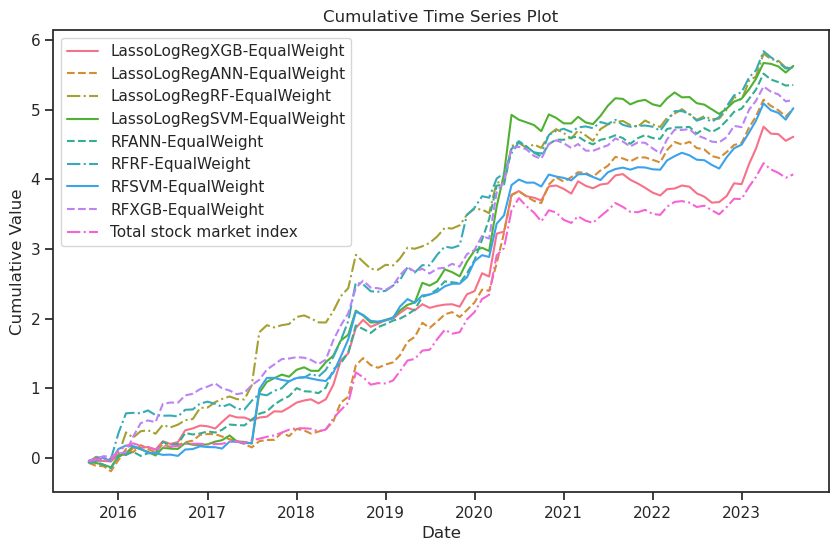

In [82]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot each column using Seaborn's lineplot with different line styles and colors
palette = sns.color_palette("husl", n_colors=len(cumulative_df.columns))
line_styles = ['-', '--', '-.']

for i, column in enumerate(cumulative_df.columns):
    sns.lineplot(data=cumulative_df[column], label=column, linestyle=line_styles[i % len(line_styles)], color=palette[i])

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Time Series Plot')

# Show legend
plt.legend()

# Save the plot to a file (optional)
plt.savefig("cumulative_time_series_plot.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [107]:
cumulative_df.to_excel('./cumulative_df_EW.xlsx', index=True)

In [86]:
sorted_performace = cumulative_df.iloc[-1].sort_values(ascending=False)

In [94]:
performace = pd.DataFrame(sorted_performace)

In [98]:
performace.reset_index(inplace=True)

In [100]:
performace.rename(columns={'index': 'Method', '2023-08-01 00:00:00': 'Performance'}, inplace=True)

In [104]:
column_names = performace.columns
second_column_name = column_names[1]
performace = performace.rename(columns={second_column_name: 'Performance'})

In [106]:
performace.to_excel('./performace_EW.xlsx', index=False)

In [1]:
(5.62 - 4.07) / 4.07

0.38083538083538077